In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from biopsykit.utils.dataframe_handling import multi_xs


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from fau_colors import register_cmaps
register_cmaps()

sns.set_theme(context="paper", style="white", palette="faculties", font_scale=1.2)

%matplotlib widget

In [4]:
def conf_matrix(confusion_matrix):
    x = confusion_matrix.sum(axis=1)[:, np.newaxis]
    confusion_matrix /=x
    confusion_matrix *= 100
    confusion_matrix = round(confusion_matrix,2)
    return confusion_matrix

In [5]:
def get_best_params(param_list, mod, stage, optimization_metric = "mcc"):
    gridsearch_df = pd.read_csv(path.joinpath(algorithm +"_gridsearch_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0").sort_values(by="mean_test_" + optimization_metric, ascending=False)
    gridsearch_df = gridsearch_df.reset_index(drop=True)
    param_list = ["param_" +param for param in param_list]
    return gridsearch_df[param_list].loc[0]

In [6]:
##### Fill in Algorithm here!! ####
algorithm = "adaboost"
##### Fill in Algorithm here!! ####

In [7]:
# GridSearch Parameter: fill in here:
param_list = ["learning_rate", "n_estimators"]

In [8]:
path = Path.cwd().parents[2].joinpath("exports/results_per_algorithm/")
path = path.joinpath(algorithm)

# 5 Stage
# Acc only

In [9]:
stage = "5stage"
mod = "acc"

In [10]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [11]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [12]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.546253    0.100973
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.459018    0.102335
getup_latency              6.875000   23.816799
kappa                      0.271112    0.130966
mcc                        0.328111    0.138681
net_sleep_duration       742.258929  187.385014
precision                  0.437023    0.106109
recall                     0.546253    0.100973
sleep_efficiency          75.671290   15.767126
sleep_onset              109.433036   85.820362
sleep_onset_latency       42.098214   57.810493
specifity                  0.839613    0.072585
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   174.303571  140.076874
wake_onset              1038.709821  148.888650

In [13]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,n1,n2,n3,rem
wake,53555.0,0.0,27304.0,0.0,0.0
n1,6467.0,0.0,16635.0,0.0,0.0
n2,11941.0,0.0,81142.0,0.0,0.0
n3,782.0,0.0,16302.0,0.0,0.0
rem,2308.0,0.0,29512.0,0.0,0.0


In [14]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_learning_rate      0.1
param_n_estimators     500.0
Name: 0, dtype: float64

# 5 Stage
# Acc + HRV

In [15]:
stage = "5stage"
mod = "acc_hrv"

In [16]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [17]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [18]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.558037    0.096158
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.480769    0.099142
getup_latency              5.138393   20.755107
kappa                      0.300360    0.122137
mcc                        0.348608    0.122901
net_sleep_duration       715.669643  196.174988
precision                  0.524216    0.104559
recall                     0.558037    0.096158
sleep_efficiency          72.953719   16.945855
sleep_onset              107.383929   83.277347
sleep_onset_latency       40.049107   54.480031
specifity                  0.843926    0.065070
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   202.312500  153.244494
wake_onset              1040.821429  148.539721

In [19]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,n1,n2,n3,rem
wake,56736.0,202.0,22952.0,31.0,938.0
n1,7534.0,192.0,14765.0,10.0,601.0
n2,12811.0,181.0,78514.0,210.0,1367.0
n3,861.0,7.0,15730.0,271.0,215.0
rem,3352.0,100.0,26421.0,108.0,1839.0


In [20]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_learning_rate      1.0
param_n_estimators     500.0
Name: 0, dtype: float64

# 5 Stage
# ACC + HRV + RRV

In [21]:
stage = "5stage"
mod = "acc_hrv_RRV"

In [22]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [23]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [24]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.604839    0.100236
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.558157    0.106609
getup_latency              5.973214   20.602346
kappa                      0.402029    0.131234
mcc                        0.428967    0.127473
net_sleep_duration       697.714286  194.520472
precision                  0.602208    0.100410
recall                     0.604839    0.100236
sleep_efficiency          71.237954   17.303307
sleep_onset              109.732143   89.449385
sleep_onset_latency       42.397321   63.744573
specifity                  0.851287    0.061248
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   216.227679  152.765793
wake_onset              1039.883929  148.182577

In [25]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,n1,n2,n3,rem
wake,61014.0,319.0,15112.0,159.0,4255.0
n1,8388.0,291.0,10825.0,44.0,3554.0
n2,12068.0,240.0,71042.0,2483.0,7250.0
n3,667.0,8.0,14021.0,1647.0,741.0
rem,3885.0,159.0,12612.0,103.0,15061.0


In [26]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_learning_rate      1.0
param_n_estimators     500.0
Name: 0, dtype: float64

# 5 Stage
# ACC + HRV + EDR

In [27]:
stage = "5stage"
mod = "acc_hrv_EDR"

In [28]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [29]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [30]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.570210    0.097190
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.504981    0.103515
getup_latency              9.955357   24.342802
kappa                      0.328040    0.126190
mcc                        0.368072    0.125562
net_sleep_duration       707.879464  198.842252
precision                  0.548451    0.116749
recall                     0.570210    0.097190
sleep_efficiency          72.177796   17.286626
sleep_onset              111.968750   87.041529
sleep_onset_latency       44.633929   61.581984
specifity                  0.844439    0.062167
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   204.571429  153.549817
wake_onset              1039.665179  148.991556

In [31]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,n1,n2,n3,rem
wake,58393.0,184.0,20423.0,57.0,1802.0
n1,7705.0,208.0,13608.0,18.0,1563.0
n2,12863.0,159.0,75928.0,758.0,3375.0
n3,866.0,6.0,14988.0,604.0,620.0
rem,3604.0,119.0,22451.0,109.0,5537.0


In [32]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_learning_rate      1.0
param_n_estimators     500.0
Name: 0, dtype: float64

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93113/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93113/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93113/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel

Text(0.5, 1.0, 'ACT + HRV + EDR')

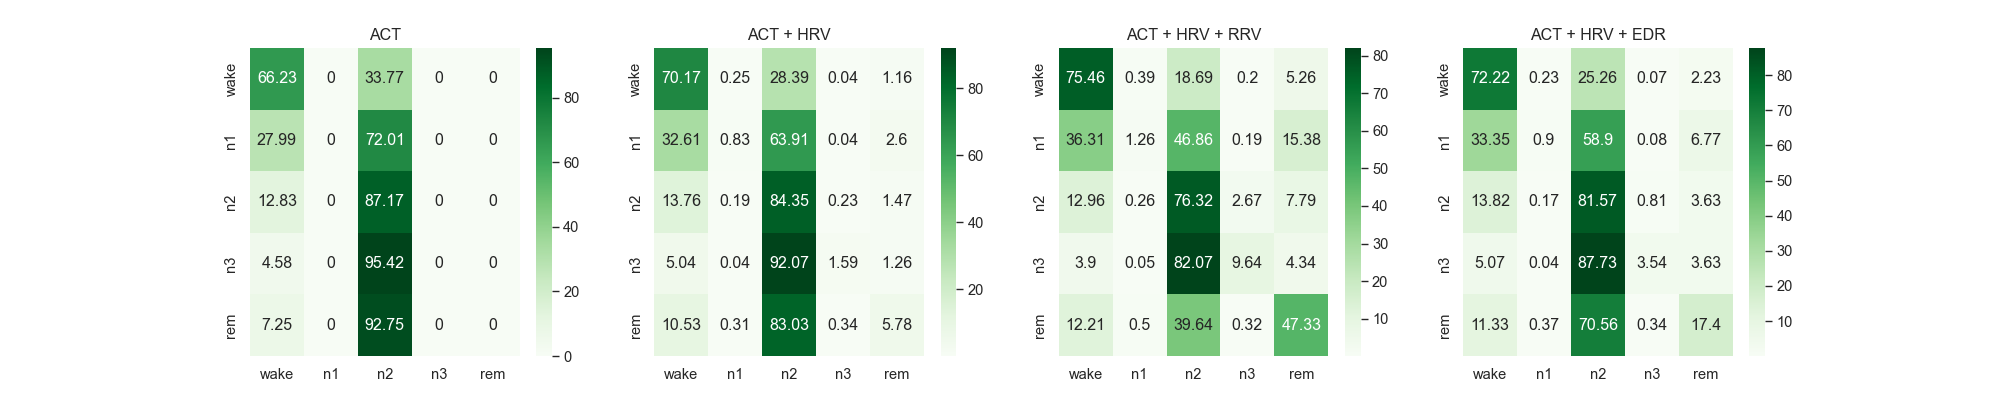

In [33]:
fig, axs = plt.subplots(ncols=4, figsize = (20,4))
sns.heatmap(conf_matrix(confusion_matrix_acc), fmt='g',annot=True, ax=axs[0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv), fmt='g',annot=True, ax=axs[1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv), fmt='g',annot=True, ax=axs[2], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr), fmt='g',annot=True, ax=axs[3], cmap="Greens")
axs[0].set_title("ACT")
axs[1].set_title("ACT + HRV")
axs[2].set_title("ACT + HRV + RRV")
axs[3].set_title("ACT + HRV + EDR")

# 3 Stage
# Acc

In [34]:
stage = "3stage"
mod = "acc"

In [35]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [36]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [37]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.684401    0.093613
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.629109    0.097237
getup_latency              6.138393   23.258608
kappa                      0.364319    0.167646
mcc                        0.414110    0.166663
net_sleep_duration       790.084821  178.007424
precision                  0.628139    0.088384
recall                     0.684401    0.093613
sleep_efficiency          80.539583   14.044898
sleep_onset              103.669643   83.779006
sleep_onset_latency       36.334821   52.148971
specifity                  0.806939    0.110253
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   135.776786  125.739478
wake_onset              1040.075893  148.778249

In [38]:
confusion_matrix_acc= pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,nrem,rem
wake,48707.0,32150.0,2.0
nrem,13378.0,119881.0,10.0
rem,1361.0,30459.0,0.0


# 3 Stage
# Acc + HRV

In [39]:
stage = "3stage"
mod = "acc_hrv"

In [40]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [41]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [42]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.689929    0.093750
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.637181    0.097878
getup_latency              5.500000   19.629528
kappa                      0.384545    0.160568
mcc                        0.432720    0.154194
net_sleep_duration       772.334821  184.679845
precision                  0.674915    0.094166
recall                     0.689929    0.093750
sleep_efficiency          78.749365   15.073679
sleep_onset              101.830357   83.362237
sleep_onset_latency       34.495536   50.132291
specifity                  0.813278    0.101617
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   154.571429  135.914456
wake_onset              1041.187500  148.823429

In [43]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,nrem,rem
wake,51047.0,29650.0,162.0
nrem,14469.0,118517.0,283.0
rem,1980.0,29488.0,352.0


# 3 Stage
# Acc + HRV + RRV

In [44]:
stage = "3stage"
mod = "acc_hrv_RRV"

In [45]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [46]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [47]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.728752    0.098244
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.710206    0.104215
getup_latency              5.700893   20.967727
kappa                      0.496915    0.157367
mcc                        0.523813    0.146769
net_sleep_duration       754.160714  187.295697
precision                  0.756161    0.075876
recall                     0.728752    0.098244
sleep_efficiency          76.960004   15.803915
sleep_onset              102.861607   84.300836
sleep_onset_latency       35.526786   54.341712
specifity                  0.819729    0.087971
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   169.883929  141.382618
wake_onset              1041.008929  149.046566

In [48]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,nrem,rem
wake,55542.0,22914.0,2403.0
nrem,14460.0,112625.0,6184.0
rem,2323.0,18294.0,11203.0


In [49]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_learning_rate      1.0
param_n_estimators     500.0
Name: 0, dtype: float64

# 3 Stage
# Acc + HRV + EDR

In [50]:
stage = "3stage"
mod = "acc_hrv_EDR"

In [51]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [52]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [53]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.698145    0.093548
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.656547    0.099727
getup_latency              9.218750   25.714566
kappa                      0.411219    0.158262
mcc                        0.452286    0.150655
net_sleep_duration       764.450893  188.395818
precision                  0.708041    0.091142
recall                     0.698145    0.093548
sleep_efficiency          77.979055   15.711396
sleep_onset              104.415179   83.010410
sleep_onset_latency       37.080357   52.529665
specifity                  0.811699    0.095510
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   159.254464  141.578901
wake_onset              1040.401786  148.751393

In [54]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,nrem,rem
wake,52618.0,27525.0,716.0
nrem,14828.0,116581.0,1860.0
rem,2211.0,26808.0,2801.0


In [55]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_learning_rate      1.0
param_n_estimators     500.0
Name: 0, dtype: float64

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93113/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93113/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93113/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel

Text(0.5, 1.0, 'ACT + HRV + EDR')

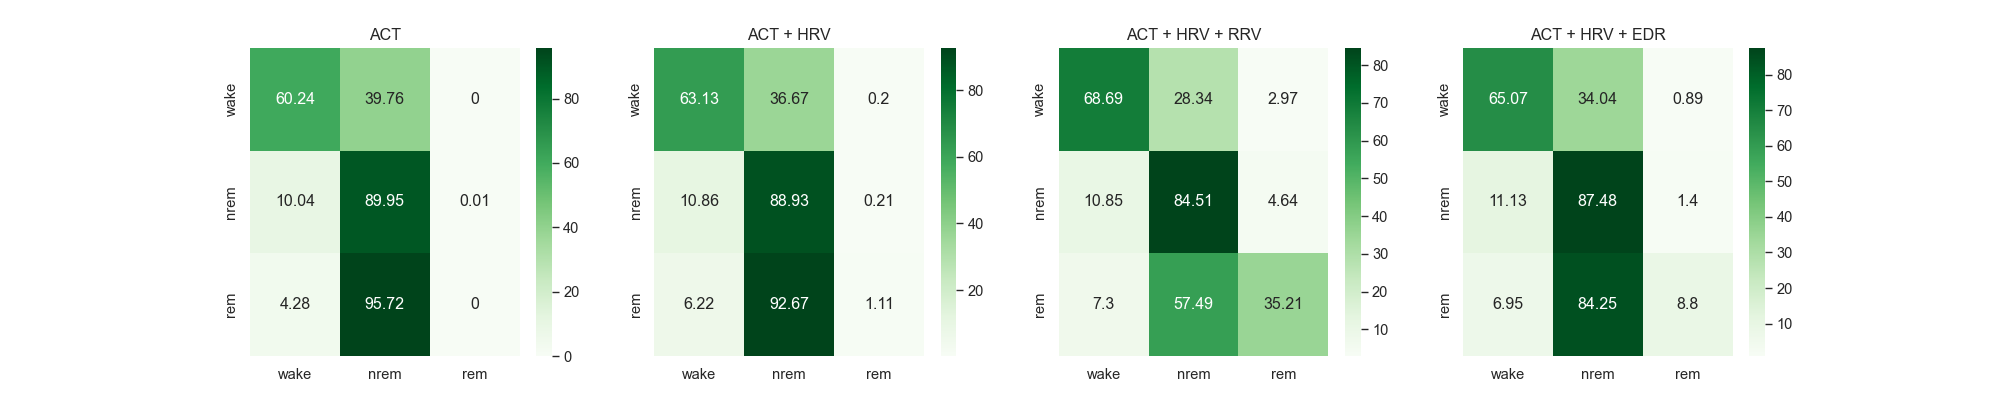

In [56]:
fig, axs = plt.subplots(ncols=4, figsize = (20,4))
sns.heatmap(conf_matrix(confusion_matrix_acc), fmt='g',annot=True, ax=axs[0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv), fmt='g',annot=True, ax=axs[1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv), fmt='g',annot=True, ax=axs[2], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr), fmt='g',annot=True, ax=axs[3], cmap="Greens")
axs[0].set_title("ACT")
axs[1].set_title("ACT + HRV")
axs[2].set_title("ACT + HRV + RRV")
axs[3].set_title("ACT + HRV + EDR")

# Binary
# Acc only

In [57]:
stage = "binary"
mod = "acc"

In [58]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [59]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [60]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.809494    0.106450
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.857355    0.097973
getup_latency              6.008929   23.018805
kappa                      0.516760    0.225208
mcc                        0.546908    0.214130
net_sleep_duration       804.776786  175.928324
precision                  0.818166    0.114205
recall                     0.916495    0.114728
sleep_efficiency          82.038427   13.611984
sleep_onset              102.651786   83.426046
sleep_onset_latency       35.316964   51.498030
specifity                  0.573527    0.215263
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   122.995536  121.010302
wake_onset              1040.383929  148.651864

In [61]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,sleep
wake,46950.0,33909.0
sleep,12846.0,152243.0


In [62]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="accuracy")

param_learning_rate      1.0
param_n_estimators     500.0
Name: 0, dtype: float64

# Binary
# Acc + HRV

In [63]:
stage = "binary"
mod = "acc_hrv"

In [64]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [65]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [66]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.814468    0.105087
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.859082    0.099285
getup_latency              5.263393   19.123561
kappa                      0.538158    0.213641
mcc                        0.568513    0.198368
net_sleep_duration       789.031250  180.924516
precision                  0.830021    0.114843
recall                     0.909601    0.122142
sleep_efficiency          80.464106   14.511594
sleep_onset              102.294643   83.020624
sleep_onset_latency       34.959821   50.511049
specifity                  0.609076    0.219718
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   138.790179  130.953405
wake_onset              1041.504464  148.776414

In [67]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,sleep
wake,49480.0,31379.0
sleep,14142.0,150947.0


In [68]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="accuracy")

param_learning_rate      1.0
param_n_estimators     500.0
Name: 0, dtype: float64

# Binary
# Acc + HRV + RRV

In [69]:
stage = "binary"
mod = "acc_hrv_RRV"

In [70]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [71]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [72]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.830616    0.099655
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.868088    0.105697
getup_latency              5.763393   21.402659
kappa                      0.584526    0.194302
mcc                        0.610531    0.178257
net_sleep_duration       774.669643  183.679819
precision                  0.847748    0.108382
recall                     0.909733    0.128466
sleep_efficiency          79.042917   15.173509
sleep_onset              102.196429   84.110843
sleep_onset_latency       34.861607   53.931975
specifity                  0.659513    0.204126
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   150.785714  137.134867
wake_onset              1040.790179  149.202801

In [73]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,sleep
wake,53429.0,27430.0
sleep,14181.0,150908.0


In [74]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="accuracy")

param_learning_rate      1.0
param_n_estimators     500.0
Name: 0, dtype: float64

# Binary
# Acc + HRV + EDR

In [75]:
stage = "binary"
mod = "acc_hrv_EDR"

In [76]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [77]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [78]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.819214    0.102233
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.861093    0.101098
getup_latency              8.589286   24.824064
kappa                      0.552299    0.206152
mcc                        0.582097    0.190917
net_sleep_duration       782.151786  185.268256
precision                  0.837338    0.112355
recall                     0.907025    0.127198
sleep_efficiency          79.775765   15.110388
sleep_onset              105.169643   81.953108
sleep_onset_latency       37.834821   52.992295
specifity                  0.627936    0.216962
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   141.875000  135.787860
wake_onset              1041.031250  148.157939

In [79]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,sleep
wake,51055.0,29804.0
sleep,14511.0,150578.0


In [80]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="accuracy")

param_learning_rate      1.0
param_n_estimators     500.0
Name: 0, dtype: float64

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93113/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93113/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93113/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel

Text(0.5, 1.0, 'ACT + HRV + EDR')

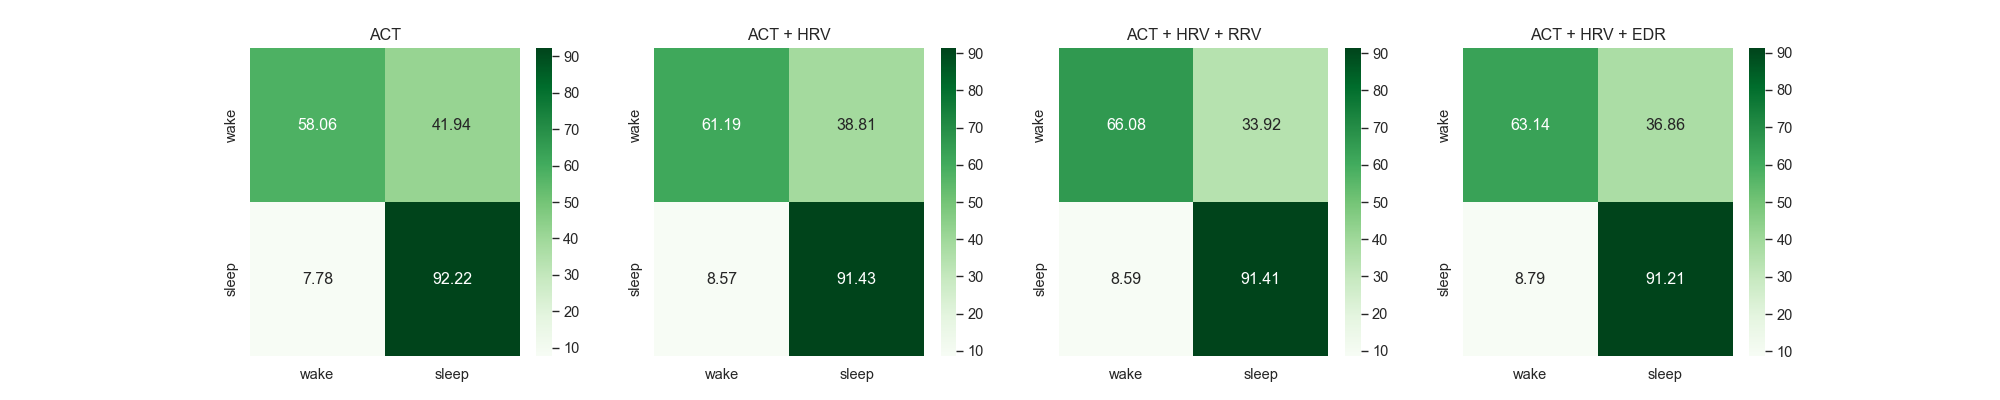

In [81]:
fig, axs = plt.subplots(ncols=4, figsize = (20,4))
sns.heatmap(conf_matrix(confusion_matrix_acc), fmt='g',annot=True, ax=axs[0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv), fmt='g',annot=True, ax=axs[1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv), fmt='g',annot=True, ax=axs[2], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr), fmt='g',annot=True, ax=axs[3], cmap="Greens")
axs[0].set_title("ACT")
axs[1].set_title("ACT + HRV")
axs[2].set_title("ACT + HRV + RRV")
axs[3].set_title("ACT + HRV + EDR")